In [1]:
%load_ext lab_black

In [7]:
import math
import itertools

import pandas as pd
from venn import venn

import numpy as np, scipy.stats as st
from tools.EnrichemntAnalysis import EnrichmentAnalysis
from tools.utils import EPIC

pd.options.mode.chained_assignment = None

In [8]:
# Load EPIC annotations

In [9]:
epic = pd.read_csv(
    "../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    index_col=0,
    low_memory=False,
)

# promotors = epic[
#     ["UCSC_RefGene_Group", "UCSC_RefGene_Name"]
# ].dropna()  # Identify CpGs associated with promotors
# promotors = promotors[promotors["UCSC_RefGene_Group"].str.contains("TSS200|TSS1500")]

# EPIC.extract_genes(promotors, 1).to_csv(
#     "../EPIG_genes_BG_only_promotors.csv"
# )  # Prepare BG

In [10]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]

    return set(df.index)

In [11]:
# Load raw reports

spain = pd.read_csv("output/SpainCoV_vs_HB.csv", index_col=0)

pl = pd.read_csv("output/PLCoV_vs_HB.csv", index_col=0)

usa = pd.read_csv("output/USACoV_vs_HB.csv", index_col=0)

nonCov = pd.read_csv("output/USANoNCoV_vs_CoV.csv", index_col=0)

In [12]:
# Intersection between CoV groups USA SPAIN PL/PUM

In [13]:
intersect = set.intersection(set(spain.index), set(pl.index), set(usa.index))

spain_ = spain.loc[intersect]
pl_ = pl.loc[intersect]
usa_ = usa.loc[intersect]

In [14]:
spain_selected = extract(spain_)
pl_selected = extract(pl_)
usa_selected = extract(usa_)

<AxesSubplot:>

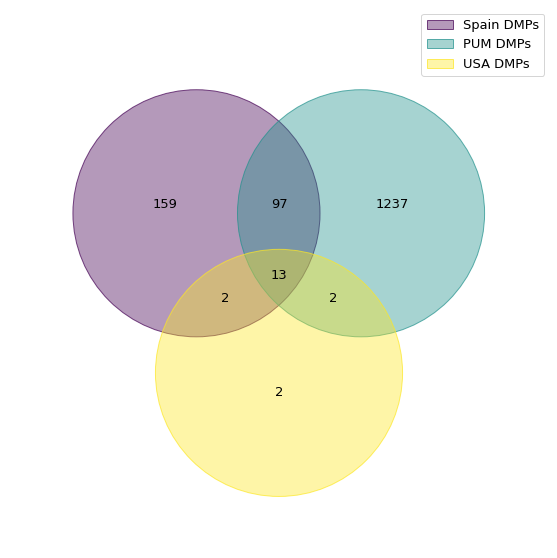

In [15]:
venn(
    {
        "Spain DMPs": spain_selected,
        "PUM DMPs": pl_selected,
        "USA DMPs": usa_selected,
    },
    figsize=(10, 10),
)

In [16]:
# Save intersection
intersection = list(set.intersection(spain_selected, pl_selected, usa_selected))

intersection = pd.Series(intersection)
print(intersection)

intersection.to_csv("../DMPsInAllStudies.csv")

0     cg17515347
1     cg21465162
2     cg12981595
3     cg24315703
4     cg21673175
5     cg22930808
6     cg03782202
7     cg25060243
8     cg21581312
9     cg08585897
10    cg18642567
11    cg13407664
12    cg19556901
dtype: object


In [17]:
# CpGs in TSS200 or TSS1500 -> Genes
epic= pd.read_csv("../data/Additional/EPIC/MethylationEPIC_v-1-0_B4.csv", index_col=0, low_memory=False)

spain_selected_genes = EPIC.extract_genes(
    epic.loc[spain_selected, "UCSC_RefGene_Name"]
)  # Extract genes

pl_selected_genes = EPIC.extract_genes(epic.loc[pl_selected, "UCSC_RefGene_Name"])
usa_selected_genes = EPIC.extract_genes(epic.loc[usa_selected, "UCSC_RefGene_Name"])

spain_selected_genes = set(spain_selected_genes.Genes)  # Convert to set
pl_selected_genes = set(pl_selected_genes.Genes)
usa_selected_genes = set(usa_selected_genes.Genes)

<AxesSubplot:>

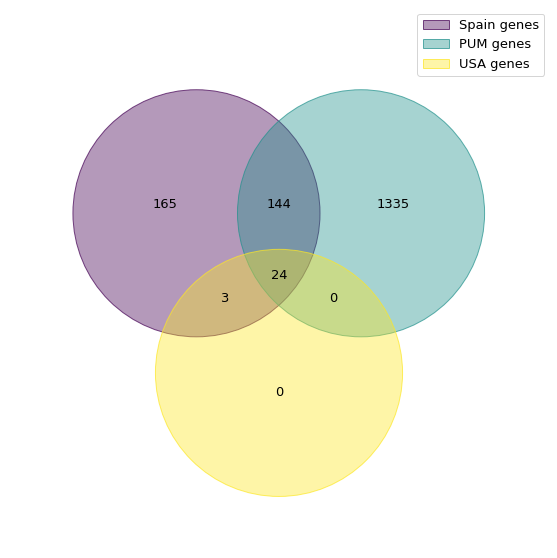

In [14]:
venn(
    {
        "Spain genes": spain_selected_genes,
        "PUM genes": pum_selected_genes,
        "USA genes": usa_selected_genes,
    },
    figsize=(10, 10),
)

In [28]:
summary = pd.concat(
    (
        epic.loc[
            intersection, ["UCSC_RefGene_Name", "UCSC_RefGene_Group"]
        ],
    ),
    axis=1,
)

summary.to_csv("../DMGInAllStudiesRaw.csv")
summary

,UCSC_RefGene_Name,UCSC_RefGene_Group
IlmnID,,
cg18642567,RPGRIP1,TSS1500
cg17515347,AIM2,TSS1500
cg13407664,HTN1,TSS1500
cg21465162,UBQLN1;UBQLN1,TSS200;TSS200
cg22930808,PARP9;PARP9;DTX3L;PARP9;PARP9;PARP9;PARP9,5'UTR;5'UTR;TSS1500;5'UTR;5'UTR;5'UTR;5'UTR
cg25060243,UGT1A10;UGT1A6;UGT1A8;UGT1A6;UGT1A9;UGT1A4;UGT...,Body;Body;Body;Body;Body;TSS1500;Body;Body
cg12981595,KRTAP4-8,TSS200
cg21581312,LOC723972,TSS200
cg19556901,SNORD115-1,TSS1500
